In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv('Dataset/DatasetForCoffeeSales2.csv')
df.head()


,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             730 non-null    object
 1   Customer_ID      730 non-null    int64 
 2   City             730 non-null    object
 3   Category         730 non-null    object
 4   Product          730 non-null    object
 5   Unit Price       730 non-null    int64 
 6   Quantity         730 non-null    int64 
 7   Sales Amount     730 non-null    int64 
 8   Used_Discount    730 non-null    bool  
 9   Discount_Amount  730 non-null    int64 
 10  Final Sales      730 non-null    int64 
dtypes: bool(1), int64(6), object(4)
memory usage: 57.9+ KB


In [6]:
df.isnull().sum()

Date               0
Customer_ID        0
City               0
Category           0
Product            0
Unit Price         0
Quantity           0
Sales Amount       0
Used_Discount      0
Discount_Amount    0
Final Sales        0
dtype: int64

/var/folders/22/_zfrzr2s7jg7x6l4bp4ldz3m0000gn/T/ipykernel_26211/2874907692.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x='Product', y='Final Sales', palette="viridis")


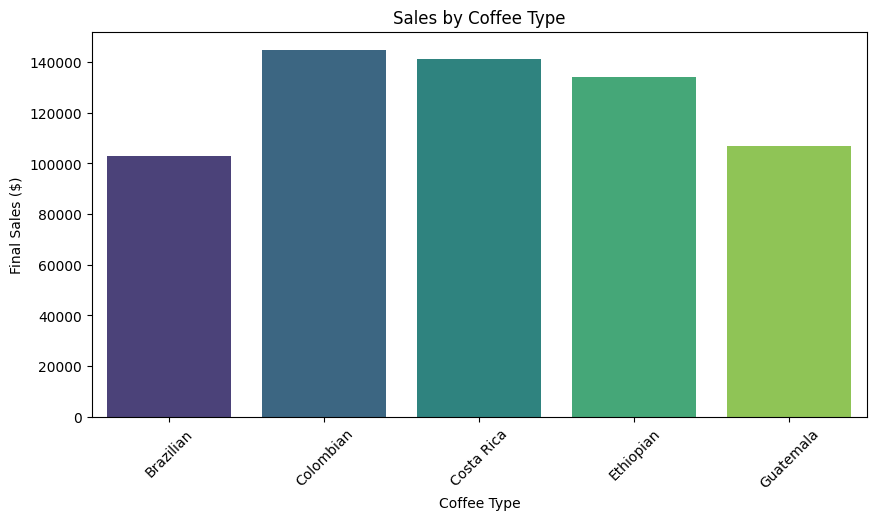

In [7]:
#sales by coffee type
product_sales = df.groupby('Product')['Final Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=product_sales, x='Product', y='Final Sales', palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Coffee Type")
plt.ylabel("Final Sales ($)")
plt.title("Sales by Coffee Type")
plt.show()


/var/folders/22/_zfrzr2s7jg7x6l4bp4ldz3m0000gn/T/ipykernel_26211/1462480125.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date').sum()


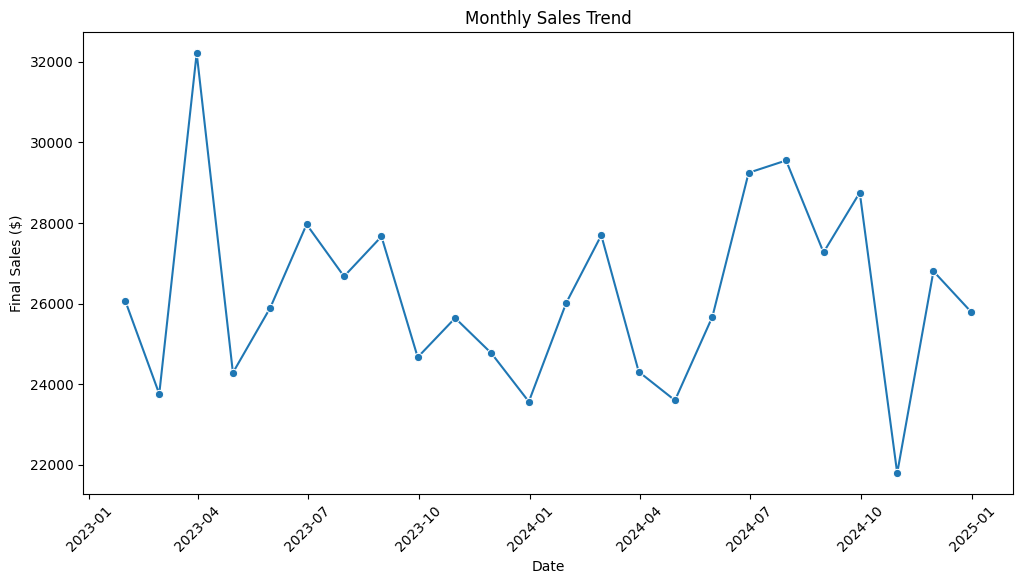

In [8]:
#total sales per month 
df['Date'] = pd.to_datetime(df['Date'])


monthly_sales = df.resample('M', on='Date').sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x=monthly_sales.index, y='Final Sales', marker='o')
plt.xlabel("Date")
plt.ylabel("Final Sales ($)")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()

/var/folders/22/_zfrzr2s7jg7x6l4bp4ldz3m0000gn/T/ipykernel_26211/1506727324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Used_Discount', y='Final Sales', palette="coolwarm")


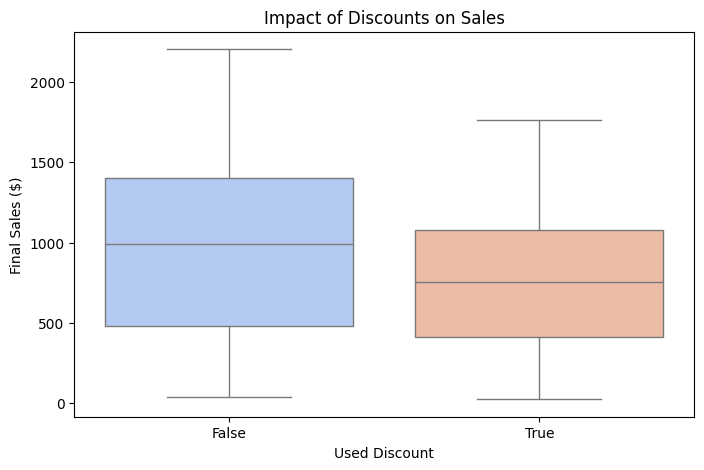

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Used_Discount', y='Final Sales', palette="coolwarm")
plt.xlabel("Used Discount")
plt.ylabel("Final Sales ($)")
plt.title("Impact of Discounts on Sales")
plt.show()


/var/folders/22/_zfrzr2s7jg7x6l4bp4ldz3m0000gn/T/ipykernel_26211/2070626144.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_sales, x='City', y='Final Sales', palette="coolwarm")


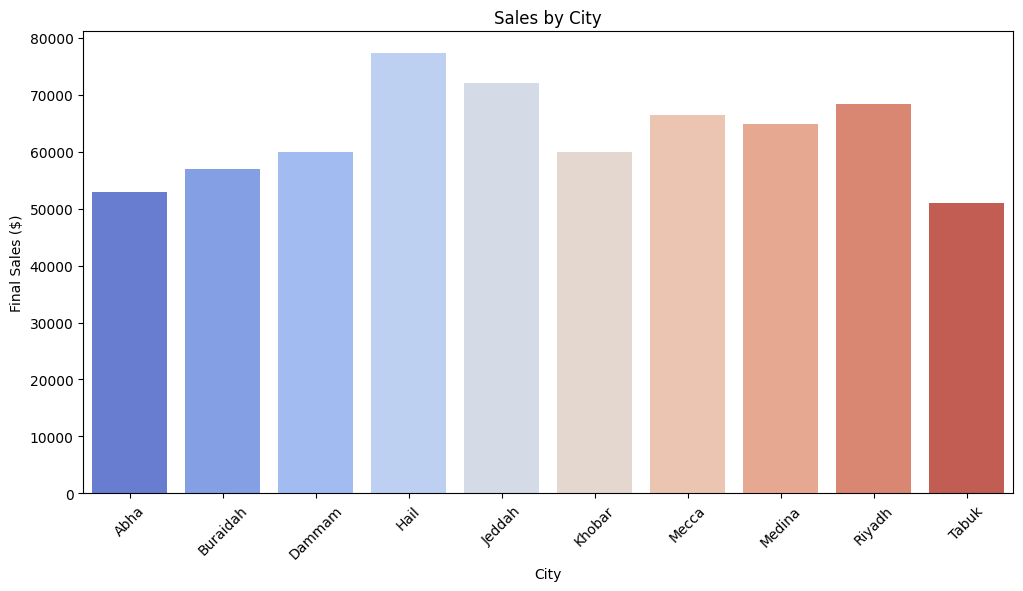

In [10]:
# Aggregate sales per city
city_sales = df.groupby('City')['Final Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=city_sales, x='City', y='Final Sales', palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Final Sales ($)")
plt.title("Sales by City")
plt.show()
